In [78]:
from collections import Counter
from os import path
from typing import List

import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray
from pandas import read_csv, DataFrame, Series
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [79]:
def informations_qualitatives_data(columns : List[str], dataframe: DataFrame) -> None:
    for column_name in columns:
        counter = Counter(dataframe[column_name])
        len_values = len(dataframe[column_name].unique())
        print(f" {column_name} : {len_values} values with \n {counter}")
        

def catplot_columns(columns: List[str], dataframe: DataFrame) -> None:
    for column_name in columns:
        sns.catplot(data=dataframe, x=column_name, kind="box")
    return None


def print_scores(y_true, y_pred) -> None:
    mse = mean_squared_error(y_true=y_true, y_pred=y_pred)
    print("mse: ",mse)
    rmse = np.sqrt(mse)
    print("rmse: ",rmse)
    mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
    print("mae: ",mae)
    print(f"Actual selling prices mean : {y_true.mean()} and Predicted selling price mean : {y_pred.mean()} with a difference of : {y_true.mean() - y_pred.mean()}")

def visualize__regression(dataset_test: DataFrame, selling_price_test: Series, predicted_prices: NDArray) -> None:
    plt.scatter(x=dataset_test, y=selling_price_test, color="black")
    plt.plot(dataset_test, predicted_prices, "r-")
    plt.show()

In [80]:
dataframe = read_csv(path.join("..", 'data/raw','carData.csv'))
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [81]:
dataframe.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Dataset's informations
We have a dataset of **301 observations** with **9 features** about cars. Each observation is information about a specific car model.  
We have 5 **numericals** features and 4 **qualitatives** features (3 are **categoricals**).  
It is a short dataframe but there isn't any null values.

***
### Now let's find out about our numericals data

In [82]:
dataframe.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


- compare selling & present price  

/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Count'>

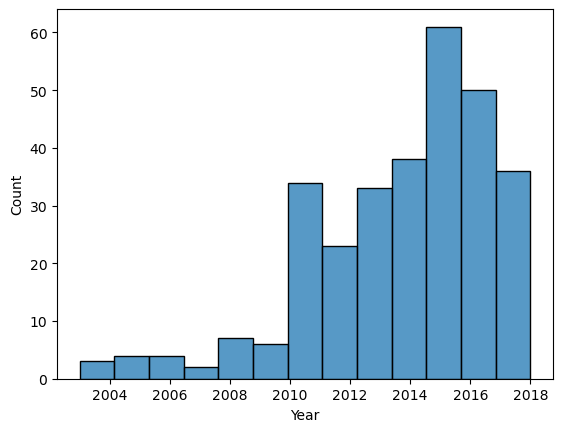

In [83]:
sns.histplot(data=dataframe, x="Year")

/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Owner', ylabel='Count'>

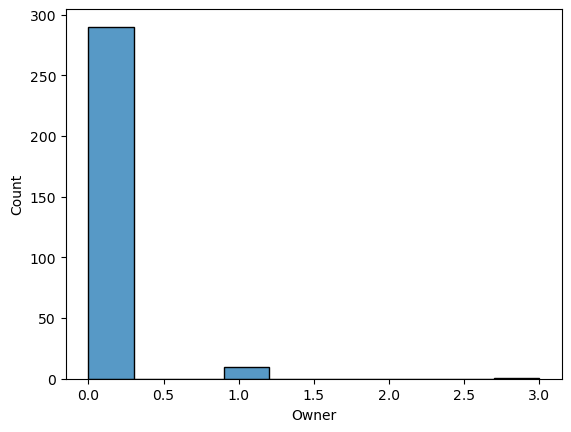

In [84]:
sns.histplot(data=dataframe, x="Owner")

Owner is a boolean feature, it should be typed as an object, not a int64

In [85]:
dataframe["Owner"] = dataframe["Owner"].astype(dtype="object")

In [86]:
dataframe[dataframe["Selling_Price"] >= dataframe["Present_Price"]].count()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

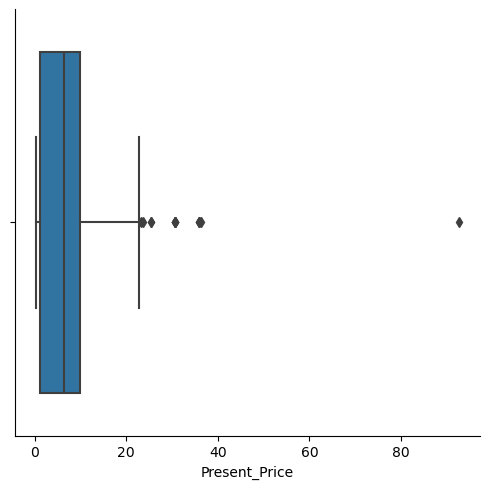

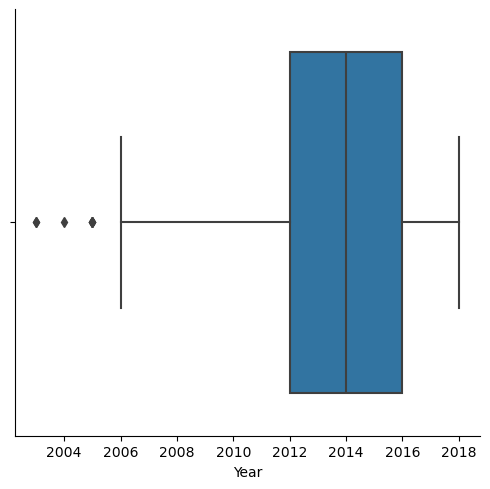

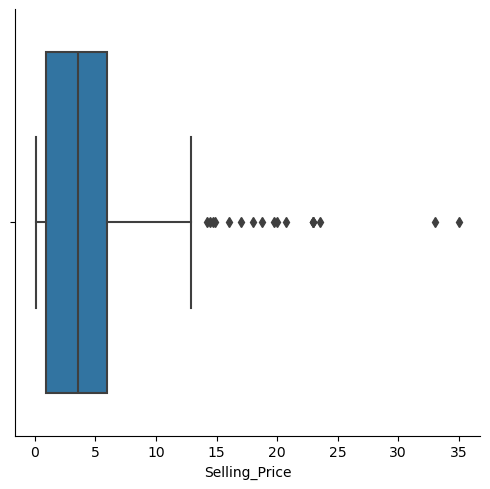

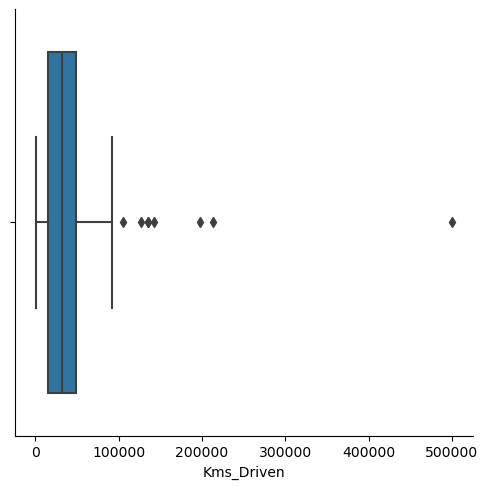

In [87]:
categorical_columns = ["Car_Name", "Fuel_Type", "Seller_Type", "Transmission", "Owner"]
numerical_columns = list(set(dataframe.columns) - set(categorical_columns))
catplot_columns(columns=numerical_columns, dataframe=dataframe)

In [88]:
dataframe.drop(dataframe[dataframe["Present_Price"]==dataframe["Present_Price"].max()].index, inplace=True)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       300 non-null    object 
 1   Year           300 non-null    int64  
 2   Selling_Price  300 non-null    float64
 3   Present_Price  300 non-null    float64
 4   Kms_Driven     300 non-null    int64  
 5   Fuel_Type      300 non-null    object 
 6   Seller_Type    300 non-null    object 
 7   Transmission   300 non-null    object 
 8   Owner          300 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 23.4+ KB


# Describe quantitatives data  
The dataset is about the 301 cars models between 2003 & 2018. 50% of them were created between 2003 & 2014, the other half between 2014 & 2018.  
The selling price start at 0.1 and finish at 35, with the median of the prices at 3.6.  
In opposition, the present price is always bigger, because it start at 0.3 and finish at 92 with the median of the prices at 6.4.  
The kms driven go from 500 km to 500 000 km with half more than 32 000 km.  
75% of the cars have 0 owner and it can go to 3 owners maximum.  
***
Thanks to Seaborn, we can create catplot charts. These charts are very usefull to fully understand the distribution of numericals data. For exemple with the Year chart, we can uderstande that the main years representated are between 2012 & 2016, there are some generally between 2006 & 2018, and before 2006 there are very few observations. 
We also see that present price have a big outlier, so we will drop it

***
### Now let's find out about our categoricals data

/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


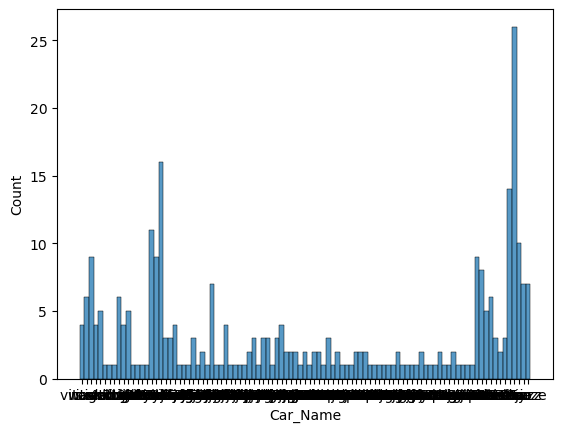

In [89]:
ax = sns.histplot(data=dataframe, x="Car_Name")

We are not interested by the car name exactly, but more about the distribution by car_name (we could have encoded it & catplot, but it is a little bit too much effort for me).  
It seems quite distributed, with some cars that appear more than 2

In [90]:
informations_qualitatives_data(columns=categorical_columns, dataframe=dataframe)

 Car_Name : 97 values with 
 Counter({'city': 26, 'corolla altis': 16, 'verna': 14, 'fortuner': 11, 'brio': 10, 'ciaz': 9, 'innova': 9, 'i20': 9, 'grand i10': 8, 'Royal Enfield Classic 350': 7, 'amaze': 7, 'jazz': 7, 'sx4': 6, 'ertiga': 6, 'eon': 6, 'swift': 5, 'alto k10': 5, 'i10': 5, 'ritz': 4, 'wagon r': 4, 'dzire': 4, 'etios liva': 4, 'Royal Enfield Thunder 350': 4, 'Bajaj Pulsar 150': 4, 'etios cross': 3, 'etios g': 3, 'Royal Enfield Thunder 500': 3, 'Bajaj Avenger 220': 3, 'Honda CB Hornet 160R': 3, 'Yamaha FZ S V 2.0': 3, 'TVS Apache RTR 160': 3, 'Bajaj Pulsar NS 200': 3, 'xcent': 3, 'creta': 3, 'KTM RC200': 2, 'Royal Enfield Classic 500': 2, 'Honda CBR 150': 2, 'Hero Extreme': 2, 'Bajaj Avenger 220 dtsi': 2, 'Yamaha FZ  v 2.0': 2, 'Bajaj Pulsar 220 F': 2, 'TVS Apache RTR 180': 2, 'Honda Activa 4G': 2, 'Hero Splender iSmart': 2, 'Activa 3g': 2, 'Hero Passion Pro': 2, 'Honda Karizma': 2, 'Honda CB Shine': 2, 'Honda CB twister': 2, 'Bajaj Discover 125': 2, 'elantra': 2, 'vitara br

# Describe qualitatives data
The dataset is about the 301 cars with :
98 cars name with often between 1 to 6 cars by models (they are some exceptions).  
3 Fuel type, with 4/5 of Petrol, 1/5 of Diesel & 2 cars of CNG?  
2 seller type, with 2/3 Dealer and 1/3 Individual.  
And finally 2 transmissions, with a bit more than 5/6 Manual and a little less than 1/5 Automatic.  

***
### And what about correlation (linear)

In [91]:
dataframe_numerical = dataframe.drop(columns=categorical_columns)
correlation_matrix = dataframe_numerical.corr()


In [92]:
correlation_matrix["Kms_Driven"].sort_values(ascending=True)

Year            -0.522260
Selling_Price    0.008660
Present_Price    0.205733
Kms_Driven       1.000000
Name: Kms_Driven, dtype: float64

In [93]:
correlation_matrix["Selling_Price"].sort_values(ascending=True)

Kms_Driven       0.008660
Year             0.279028
Present_Price    0.884244
Selling_Price    1.000000
Name: Selling_Price, dtype: float64

<Axes: >

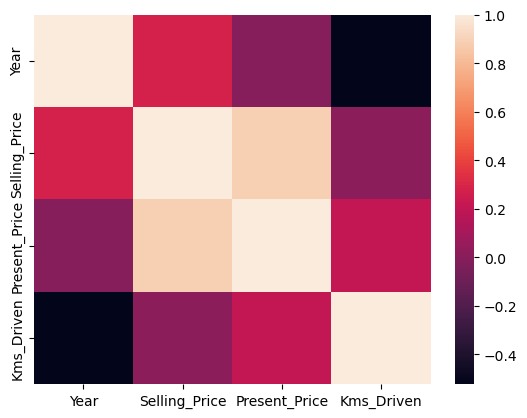

In [94]:
sns.heatmap(data=correlation_matrix)
# im, _ = ax.imshow(correlation_matrix, cmap="PuOr", vmin=-1, vmax=1)

# Observations of correlations
As we can see with our matrix of correlation, the relation between Year and Selling Price is about a correlation of 0.2 (it seems acceptable but not impressive). Which means Year is a little correlated with Selling Price.  
The heatmap is a chart that enables us to visually see the correlations between all variables with a symetric chart. As we can see, there is a really good correlation between Selling price and Present price, but also a pretty good negative correlation between year & kms driven. There is also a better correlation of the Kms driven with the present price than with the selling price.  
**What for ?** : The heatmap could be use for many things. If there is a really good linear correlation with the predicted column we can go for a linear model (Linear Regression). If there are correlations between variables, we can drop one of them in a dimensionality reduction purpose.

***
### Univariate regression with python libraries

# Performance evaluation
We have our predictions of the selling prices, but now we need to evaluate how good they are comparing to the reality.   
For this tasks, we have a lot of tools :  
**Metrics :** Metrics are great tools to evaluate the performance of a model. It will be the distance between the true values and the predicted values. Distance formula could depends of the context.
- Mean squared error (MSE) : Euclidean distance between two points, it is a very interesting metrics and could be use as a loss function. However it will be a squared values (carefull to the units) and it will not be a very good metrics when there are outliers.  
- Root mean squarred error (RMSE) : Root of the euclidean distance between two points. It is very interpretable because it will get the same unit as required output, but like mse it is not robust to outliers. It is often the preferred metric for an evaluation.  
- Mean absolute error (MAE) :  Manatthan distance between two points. It is robust to outliers and also very interpretable. But as it is not differentiable it need to be optimizes.  
Other metrics could be use but they are the 3 main metrics in regression problems.  

**Charts :** Charts are also great tools to evaluate performance of a models
***

### Scikit-Learn


In [95]:
univariate_dataset, selling_price = DataFrame(data=dataframe["Present_Price"]), dataframe["Selling_Price"]
univariate_dataset_train, univariate_dataset_test, selling_price_train, selling_price_test = train_test_split(univariate_dataset, selling_price, test_size=0.3, random_state=41)

In [96]:
linear_regressor_sklearn = LinearRegression()
linear_regressor_sklearn.fit(X=univariate_dataset_train, y=selling_price_train)
predicted_prices_sklearn = linear_regressor_sklearn.predict(X=univariate_dataset_test)

In [97]:
print_scores(y_true=selling_price_test, y_pred=predicted_prices_sklearn)

mse:  2.3822642383104013
rmse:  1.5434585314514937
mae:  1.0055568549134388
Actual selling prices mean : 4.2732222222222225 and Predicted selling price mean : 4.353279999730801 with a difference of : -0.08005777750857845


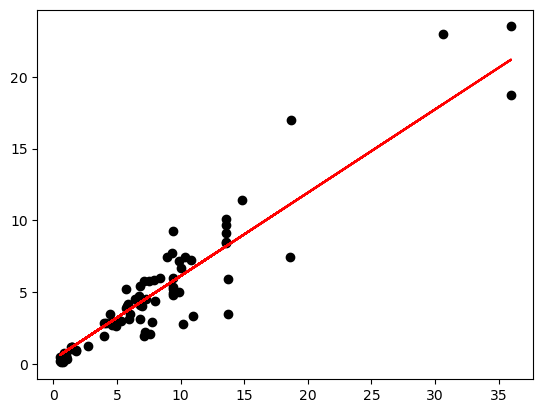

In [98]:
visualize__regression(dataset_test=univariate_dataset_test, selling_price_test=selling_price_test, predicted_prices=predicted_prices_sklearn)

### Scipit 
***

In [99]:
present_price_train, present_price_test = univariate_dataset_train["Present_Price"], univariate_dataset_test["Present_Price"]
linear_regressor_scipit = stats.linregress(x=present_price_train, y=selling_price_train)
predicted_prices_scipit = linear_regressor_scipit.intercept + linear_regressor_scipit.slope * present_price_test #type: ignore
predicted_prices_scipit

198     0.653240
51     18.082243
127     0.786684
260     8.213157
152     0.896921
         ...    
40      4.888650
221     4.262041
151     0.641636
240     5.776346
89      4.244636
Name: Present_Price, Length: 90, dtype: float64

In [100]:
print_scores(y_true=selling_price_test, y_pred=predicted_prices_scipit)

mse:  2.3822642383104022
rmse:  1.543458531451494
mae:  1.0055568549134395
Actual selling prices mean : 4.2732222222222225 and Predicted selling price mean : 4.353279999730802 with a difference of : -0.08005777750857934


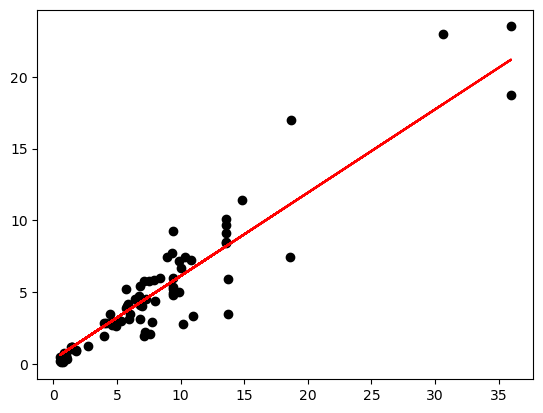

In [101]:
visualize__regression(dataset_test=univariate_dataset_test, selling_price_test=selling_price_test, predicted_prices=predicted_prices_scipit)

***
### Polyvariate regression with sklearn

First of all we need to create a polyvariate dataset with the 3 features we want : Kms_driven, Transmission and we keep the Present_price.  
After we will as usual train_test split our polyvariate dataset with the Selling_Price.  
Transmission is a categorical feature, we need to encode it (with OneHotEncoder for exemple).  
Then with the new transformed polyvariate dataset, we can fit a linear regressor on it.

/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/yaya/anaconda3/envs/tf/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


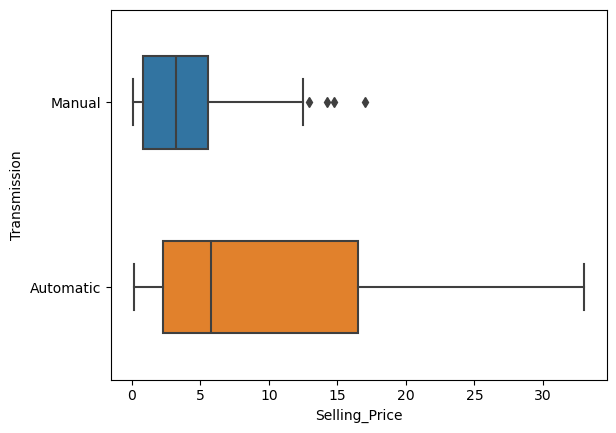

In [102]:
sns.boxplot(data=dataframe, x="Selling_Price", y="Transmission", width=.5)
plt.show()

In [103]:
chosen_features = ['Kms_Driven','Transmission']
polyvariate_dataset, selling_price = dataframe.drop(columns=[column for column in dataframe.columns if column not in chosen_features]), dataframe["Selling_Price"]
polyvariate_dataset_train, polyvariate_dataset_test, selling_price_train, selling_price_test = train_test_split(polyvariate_dataset, selling_price, test_size=0.3, random_state=41)

In [107]:
polyvariate_columns_transformers = ColumnTransformer([
    ('encode', OneHotEncoder(categories=[['Manual', 'Automatic']]), ['Transmission']),
    ('scaler', StandardScaler(), ['Year'])
])
polyvariate_dataset_train_transformed = polyvariate_columns_transformers.fit_transform(polyvariate_dataset_train)
linear_regressor_polyvariate = LinearRegression()
linear_regressor_polyvariate.fit(X=polyvariate_dataset_train_transformed,  y=selling_price_train)

polyvariate_dataset_test_transformed = polyvariate_columns_transformers.fit_transform(polyvariate_dataset_test)
predicted_prices_polyvariate = linear_regressor_polyvariate.predict(X=polyvariate_dataset_test_transformed)

In [108]:
print_scores(y_true=selling_price_test, y_pred=predicted_prices_polyvariate)

mse:  14.52266911458333
rmse:  3.8108619910176924
mae:  2.814375
Actual selling prices mean : 4.2732222222222225 and Predicted selling price mean : 4.699652777777778 with a difference of : -0.4264305555555552


### Analysis
We can see that in fact the best regression is univariate with Present_Price. However it will be to easy... So the best parameters will be a polyvariate with : Year & Transmission*  
Because of the lack of data, our model *overfit* our Dataframe. It is difficult to train it & some features (Seller_Type, Year, Fuel_Type & Transmission) are barely as good as each other.  
By analysis, some feature are really useless (bad correlation so not in a linear regression, or bad variance).  
***  
*See analysis of features in our model in 'feature_selection.ipynb' notebook. In Martin's question, we will only yse Transmission & Year.
***

# And what about Martin ?  
For the context, Martin want to buy a manual car with less than 7 years and less than 100 000 Kms. How much it will cost him ? (we only use Year & Transmission in our Model)

In [106]:
martin_car = DataFrame({'Year':2017, 'Kms_Driven' : 99999, 'Transmission':'Manual'}, index=(1,))
martin_car_transformed = polyvariate_columns_transformers.fit_transform(martin_car)
print(linear_regressor_polyvariate.predict(martin_car_transformed))

[3.90625]


# Result  
For the minimal context (so Manual, 2017 and 99 999 km), it will cost him arround **3.9**.  
Because of the RMSE arround 4 of the model, the average difference with the real price will be arround 4.